In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

In [43]:
header = ["mip", "sdip", "ekip", "skip","mDM-SNR", "sdDM-SNR", "ekDM-SNR", "skDM-SNR", "is_pulsar"]
stars = pd.read_csv("./HTRU2/HTRU_2.csv", names=header)

In [42]:
stars.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783a5e75c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f783887c898>]], dtype=object)

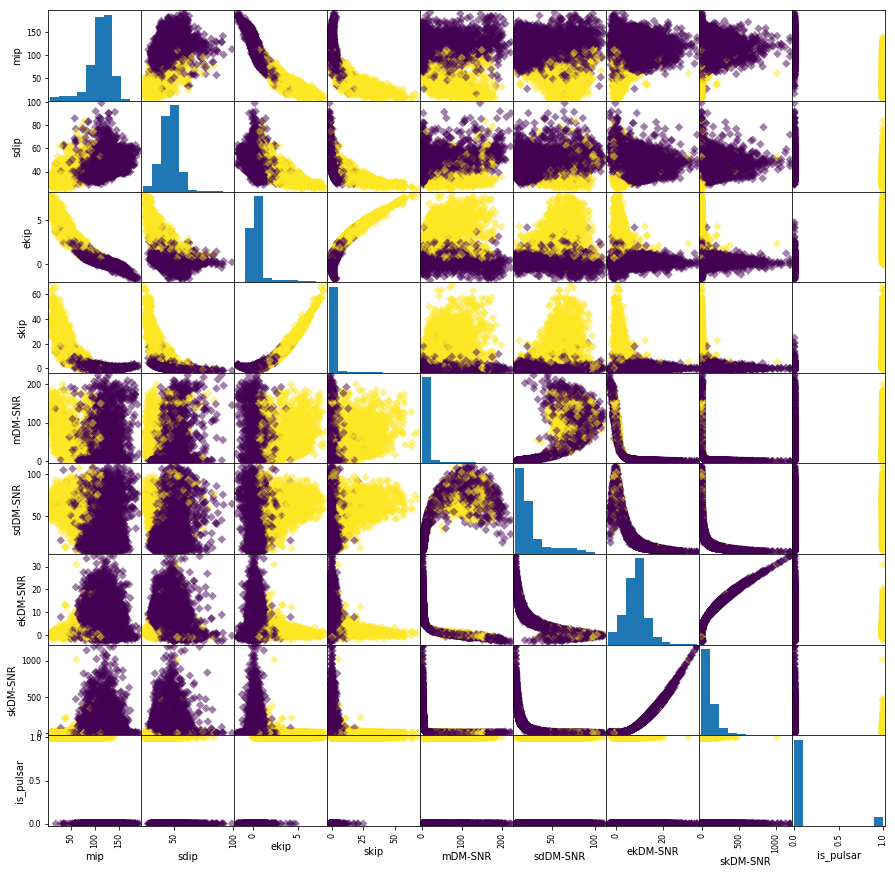

In [23]:
pd.plotting.scatter_matrix(stars, c = stars["is_pulsar"], figsize = [15,15], marker="D")

#### Ahora vamos a dividir los datos para poder encontrar de mejor forma cuales son aquellos modelos que son capaces de separar los casos en los que las estrellas son pulsares de aquellas que son otro tipo de estrellas

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = stars["is_pulsar"].values
X = stars.drop(["is_pulsar"], axis = 1).values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.97486033519553073

### Regresión logística

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_regresion = LogisticRegression()

logistic_regresion.fit(X_train, y_train)
logistic_regresion.score(X_test, y_test)

0.98016759776536311

### Árboles de decisión 

In [38]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 10,
                                min_samples_leaf = 1)

arbol.fit(X_train, y_train)
arbol.score(X_test, y_test)

0.97653631284916198